<h1> Analítica de Datos Para Ingeniería Software y Datos </h1>
<h2> S30 - Evidencia de Aprendizaje 2. Procesamiento de datos del Covid-19 en Colombia (Fase 2) </h2>
<h3> Sergio Andres Rios Gomez </h3>
<h3> Grupo: PREICA2402B010097 - Docente: Andrés Felipe Palacio</h3>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

<h3> 1. Limpieza de datos (data cleaning)</h3>

<p> 1.1 Utiliza value_counts(dropna=False), para visualizar las siguientes variables: Estado, Ubicación del caso, Sexo, Tipo de contagio, Tipo_recuperación, Pertenencia_étnica, Nombre_grupo_étnico. </p>

In [2]:
# URL de los datos
url = "https://www.datos.gov.co/api/views/gt2j-8ykr/rows.csv?accessType=DOWNLOAD&bom=true&format=true"
data = pd.read_csv(url)

C:\Users\chech\AppData\Local\Temp\ipykernel_16180\1568021956.py:3: DtypeWarning: Columns (13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(url)


In [3]:
# Estado:
conteo_estados = data['Estado'].value_counts(dropna=False)
conteo_estados

Leve         6154791
Fallecido     143125
leve           50623
NaN            41268
Moderado        1056
Grave            106
LEVE               2
Name: Estado, dtype: int64

In [4]:
# Ubicación del caso:
conteo_ubicacion = data['Ubicación del caso'].value_counts(dropna=False)
conteo_ubicacion

Casa            6177081
Fallecido        143125
NaN               41268
casa              28328
Hospital           1056
Hospital UCI        106
CASA                  7
Name: Ubicación del caso, dtype: int64

In [5]:
# Sexo:
conteo_sexo = data['Sexo'].value_counts(dropna=False)
conteo_sexo

F    3417087
M    2973872
f          6
m          6
Name: Sexo, dtype: int64

In [6]:
# Tipo de contagio:
conteo_tipo = data['Tipo de contagio'].value_counts(dropna=False)
conteo_tipo

Comunitaria    4447740
Relacionado    1939528
Importado         3703
Name: Tipo de contagio, dtype: int64

In [7]:
# Tipo_recuperación:
conteo_recuperacion = data['Tipo de recuperación'].value_counts(dropna=False)
conteo_recuperacion

Tiempo    5274348
PCR        933773
NaN        182398
TIEMPO        452
Name: Tipo de recuperación, dtype: int64

In [8]:
# Pertenencia_étnica:
conteo_etnia = data['Pertenencia étnica'].value_counts(dropna=False)
conteo_etnia

6.0    6166659
5.0     137411
1.0      84202
NaN       2156
3.0        405
2.0        138
Name: Pertenencia étnica, dtype: int64

In [9]:
# Nombre_grupo_étnico:
conteo_grupo_etnico = data['Nombre del grupo étnico'].value_counts(dropna=False)
conteo_grupo_etnico

NaN              6307107
Por definir        17222
Sin Comunidad      12064
ZENU                9264
PIJAO               4112
                  ...   
YULA                   1
CHARCO CAIMAN          1
KAIKAISHI              1
TEKIA                  1
MASHALERRAIN           1
Name: Nombre del grupo étnico, Length: 1888, dtype: int64

<p> 1.2 Realiza una limpieza de datos de las variables anteriores, haciendo uso de .zip(), .map(), .replace(), .fillna(). </p>

In [10]:
# Convertir todos los valores a minúsculas para facilitar la comparación
data['Estado'] = data['Estado'].str.lower()

# Crear un diccionario para mapear los valores a los valores estándar
mapping = {'activo': 'Activo', 'inactivo': 'Inactivo', 'n/a': 'Otro'}

# Aplicar el mapeo utilizando .map()
data['Estado'] = data['Estado'].map(mapping)

data['Estado'] = data['Estado'].fillna('Otro')

print(data['Estado'].value_counts())

Otro    6390971
Name: Estado, dtype: int64


<p> 1.3 Elimina las siguientes variables del DataFrame utilizando la función 'Del': 'Código_DIVIPOLA, Código_país, Código_departamento' y crea una copia del DataFrame.</p>
<p> Reucción del dataframe, descartando las variables que despues del EDA, se identifica que no generan valor.</p>

In [11]:
df = data[['fecha reporte web', 'Fecha de notificación', 'Nombre departamento', 'Nombre municipio','Edad', 
           'Unidad de medida de edad', 'Sexo', 'Tipo de contagio', 'Ubicación del caso', 'Estado', 'Recuperado', 
           'Fecha de inicio de síntomas', 'Fecha de diagnóstico', 'Fecha de recuperación', 'Tipo de recuperación']]

In [12]:
df.head(3)

,fecha reporte web,Fecha de notificación,Nombre departamento,Nombre municipio,Edad,Unidad de medida de edad,Sexo,Tipo de contagio,Ubicación del caso,Estado,Recuperado,Fecha de inicio de síntomas,Fecha de diagnóstico,Fecha de recuperación,Tipo de recuperación
0,2020-12-24 00:00:00,2020-12-22 00:00:00,VALLE,CALI,67,1,F,Comunitaria,Casa,Otro,Recuperado,2020-12-21 00:00:00,2020-12-23 00:00:00,2021-01-04 00:00:00,Tiempo
1,2020-12-24 00:00:00,2020-12-19 00:00:00,VALLE,CALI,66,1,F,Comunitaria,Casa,Otro,Recuperado,2020-12-07 00:00:00,2020-12-23 00:00:00,2020-12-25 00:00:00,Tiempo
2,2020-12-24 00:00:00,2020-12-19 00:00:00,VALLE,CALI,68,1,F,Comunitaria,Casa,Otro,Recuperado,2020-12-18 00:00:00,2020-12-22 00:00:00,2021-01-01 00:00:00,Tiempo


<p> 1.4 Identifica registros duplicados. </p>

In [13]:
duplicados = df.duplicated()

# Contar el número de filas duplicadas
num_duplicados = duplicados.sum()
print("Número de registros duplicados:", num_duplicados)

# Eliminar las filas duplicadas y guardar el resultado en un nuevo DataFrame
df_sin_duplicados = df.drop_duplicates()
print("Número de registros después de eliminar duplicados:", len(df_sin_duplicados))
df = df_sin_duplicados

Número de registros duplicados: 563483
Número de registros después de eliminar duplicados: 5827488


<p> 1.5 Identifica valores atípicos.. </p>

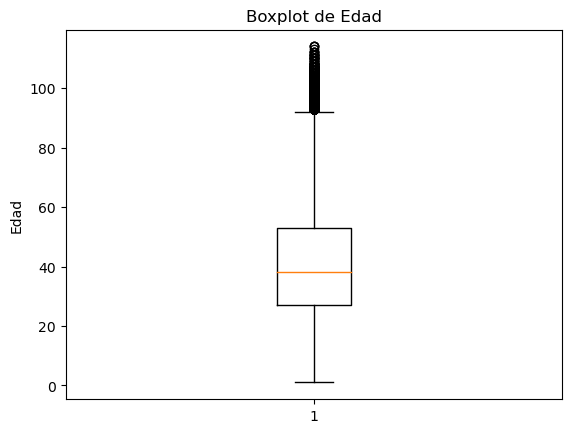

In [14]:
plt.boxplot(df['Edad'])
plt.ylabel('Edad')
plt.title('Boxplot de Edad')
plt.show()

<h4> 1.5 Conclusiones. </h4>

<li> El conteo de valores únicos en las variables categóricas como Estado, Ubicación del caso, Sexo, Tipo de contagio, Tipo de recuperación, Pertenencia étnica y Nombre del grupo étnico nos ha permitido obtener una visión general de la diversidad de datos en estas variables.</li>
<li> Esta información es fundamental para entender la distribución de los casos y para seleccionar las variables más relevantes para futuros análisis.</li>
<li> La identificación de outliers en la variable Edad nos ha permitido detectar valores extremos que podrían influir significativamente en los resultados del análisis </li>


<p>El análisis anterior reveló una distribución heterogénea de los casos por estado, con una mayor concentración en las zonas urbanas. Además, se identificó un pequeño número de outliers en la variable edad, correspondientes a pacientes geriátricos. La ausencia de duplicados garantiza la integridad de los datos y la confiabilidad de los resultados posteriores. Estos hallazgos preliminares sugieren la necesidad de realizar análisis más profundos para comprender las características de la población estudiada y las posibles causas de las variaciones observadas.</p>

<h3> 2. Codificación y decodificación de datos</h3>

<p> 2.1 Realiza una decodificación efectiva a las variables de fecha. </p>

<p> Convirtiendo los valores FECHA de tipo object a formato DATE. </p>

In [15]:
columnas_fechas = ['fecha reporte web', 'Fecha de notificación', 'Fecha de inicio de síntomas',
                  'Fecha de diagnóstico', 'Fecha de recuperación']

# Convertir las columnas a formato datetime
for columna in columnas_fechas:
    df[columna] = pd.to_datetime(df[columna], format='%Y-%m-%d %H:%M:%S')

print(df.dtypes)

fecha reporte web              datetime64[ns]
Fecha de notificación          datetime64[ns]
Nombre departamento                    object
Nombre municipio                       object
Edad                                    int64
Unidad de medida de edad                int64
Sexo                                   object
Tipo de contagio                       object
Ubicación del caso                     object
Estado                                 object
Recuperado                             object
Fecha de inicio de síntomas    datetime64[ns]
Fecha de diagnóstico           datetime64[ns]
Fecha de recuperación          datetime64[ns]
Tipo de recuperación                   object
dtype: object


<p> Pasar las variables categoricas  a minuscula </p>

In [16]:
columnas_categoricas = ['Nombre departamento', 'Nombre municipio', 'Sexo', 'Tipo de contagio', 'Ubicación del caso', 'Estado', 'Recuperado', 'Tipo de recuperación']

# Convertir las columnas a minúsculas
for columna in columnas_categoricas:
    df[columna] = df[columna].str.lower()

<p> Procesamiento de datos faltantes.</p> 

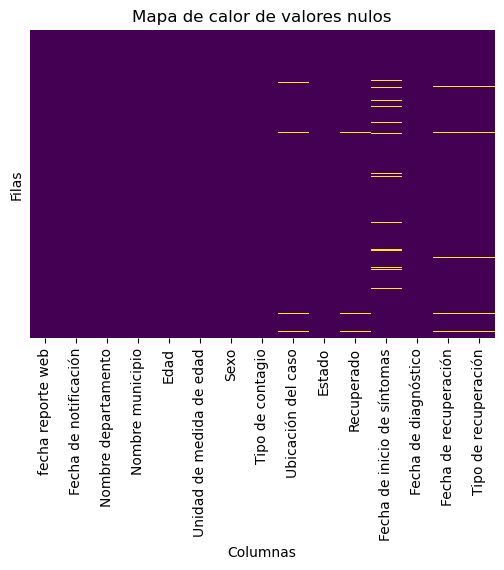

In [17]:
plt.figure(figsize=(6,4))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.xlabel('Columnas')
plt.ylabel('Filas')
plt.title('Mapa de calor de valores nulos')
plt.show()

In [18]:
# Eliminamos los registros con valores nulos en la columna 'Ubicación del caso'
df.dropna(subset=['Ubicación del caso'], inplace=True)

In [19]:
# Eliminamos los registros con valores nulos en la columna 'Recuperado'
df.dropna(subset=['Recuperado'], inplace=True)

In [20]:
# Reemplazar los valores nulos en 'Fecha de inicio de síntomas' con los valores de 'Fecha de notificación'
df['Fecha de inicio de síntomas'].fillna(df['Fecha de notificación'], inplace=True)

<p> Es normal que las columnas "Fecha de recuperación" y "Tipo de recuperación" estén vacías cuando un paciente fallece. Esto indica que el paciente no se recuperó de la enfermedad. Para el presente proyecto vamos a trabajar estas dos columnas sin modificaciones. <p>
<p> A continuación podemos ver el dataframes sin datos faltantes en las otras columnas.</p>

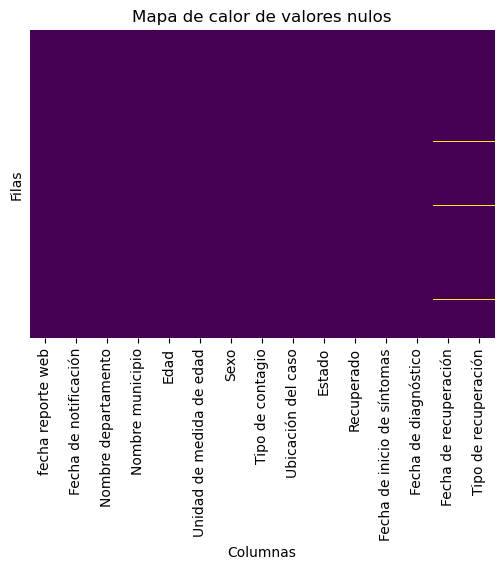

In [21]:
plt.figure(figsize=(6,4))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.xlabel('Columnas')
plt.ylabel('Filas')
plt.title('Mapa de calor de valores nulos')
plt.show()

<h3> 3. Procesamiento de datos</h3>

<p> 3.1 ¿Cuántos fallecidos hay en Colombia mayores de 60 años? </p> 

In [22]:
fallecidos_mayores_60 = df.query('Edad > 60 and Recuperado == "fallecido"')
cantidad_fallecidos_mayores_60 = len(fallecidos_mayores_60)

print("Cantidad de fallecidos mayores de 60 en Colombia (Todos los departamentos):", cantidad_fallecidos_mayores_60)

Cantidad de fallecidos mayores de 60 en Colombia (Todos los departamentos): 102489


<p> 3.2 ¿Cuántos fallecidos hay en Antioquia mayores de 60 años? </p> 

In [23]:
fallecidos_mayores_60_antioquia = df.query('`Nombre departamento` == "antioquia" & Edad > 60 & Recuperado == "fallecido"')

cantidad_fallecidos_mayores_60_antioquia = len(fallecidos_mayores_60_antioquia)

print("Cantidad de fallecidos mayores de 60 años en Antioquia:", cantidad_fallecidos_mayores_60_antioquia)

Cantidad de fallecidos mayores de 60 años en Antioquia: 13708


<p> 3.3 ¿Cuántos fallecidos hay en Medellín mayores de 60 años? </p> 

In [24]:
fallecidos_mayores_60_medellin = df.query('`Nombre municipio` == "medellin" & Edad > 60 & Recuperado == "fallecido"')

cantidad_fallecidos_mayores_60_medellin = len(fallecidos_mayores_60_medellin)

print("Cantidad de fallecidos mayores de 60 años en Medellín:", cantidad_fallecidos_mayores_60_medellin)

Cantidad de fallecidos mayores de 60 años en Medellín: 7816


<p> 3.4 Diseña una fórmula para calcular la tasa de letalidad del Covid-19 en Colombia, Antioquia y Medellín. </p> 

In [25]:
# Total de casos confirmados a nivel nacional
total_casos_colombia = len(df)

# Total de fallecidos a nivel nacional
fallecidos_colombia = len(df[df['Recuperado'] == 'fallecido'])

# Tasa de letalidad a nivel nacional
tasa_letalidad_colombia = fallecidos_colombia / total_casos_colombia * 100

print("Tasa de letalidad en Colombia:", tasa_letalidad_colombia, "%")

Tasa de letalidad en Colombia: 2.466211475274978 %


In [26]:
# Filtrar por Antioquia
antioquia_df = df[df['Nombre departamento'] == 'antioquia']

# Total de casos confirmados en Antioquia
total_casos_antioquia = len(antioquia_df)

# Total de fallecidos en Antioquia
fallecidos_antioquia = len(antioquia_df[antioquia_df['Recuperado'] == 'fallecido'])

# Tasa de letalidad en Antioquia
tasa_letalidad_antioquia = fallecidos_antioquia / total_casos_antioquia * 100

print("Tasa de letalidad en Antioquia:", tasa_letalidad_antioquia, "%")

Tasa de letalidad en Antioquia: 2.28871894339139 %


In [27]:
# Filtrar por Medellín
medellin_df = df[(df['Nombre departamento'] == 'antioquia') & (df['Nombre municipio'] == 'medellin')]

# Total de casos confirmados en Medellín
total_casos_medellin = len(medellin_df)

# Total de fallecidos en Medellín
fallecidos_medellin = len(medellin_df[medellin_df['Recuperado'] == 'fallecido'])

# Tasa de letalidad en Medellín
tasa_letalidad_medellin = fallecidos_medellin / total_casos_medellin * 100

print("Tasa de letalidad en Medellín:", tasa_letalidad_medellin, "%")

Tasa de letalidad en Medellín: 2.410715127738431 %


<p> 3.5 ¿Cuáles son los retrasos promedio entre las fechas? </p> 

In [28]:
# Calculando la diferencia en días entre las dos fechas
df['Diferencia_dias'] = (df['Fecha de diagnóstico'] - df['Fecha de notificación']).dt.days

# Calculando el promedio de días
promedio_dias = df['Diferencia_dias'].mean()

print("El retraso promedio de días entre la notificación y el diagnóstico es:", promedio_dias)

El retraso promedio de días entre la notificación y el diagnóstico es: 4.125351400371219


<h3> 4. Ingeniería de Características </h3>
<p> Feature Selection y Feature Engineering </p>

In [29]:
# Creación de nueva columna con valores Bool para registrar 1 si el pacienete fallecio y 0 si sobrevivió.
dw = df.copy()
dw['fallecido'] = np.where(dw['Recuperado'] == 'fallecido', 1, 0)

In [30]:
# Nueva columna para calcular los días que pasaron desde el inicio de sintomas hasta que fue atendido.
dw['dias_para_atencion'] = (dw['Fecha de diagnóstico'] - dw['Fecha de inicio de síntomas']).dt.days

In [31]:
# Nueva columna para calcular los días para recuperación.
dw['dias_recuperacion'] = (dw['Fecha de recuperación'] - dw['Fecha de inicio de síntomas']).dt.days

<p> Convertir variables categóricas a numéricas es un paso esencial en la preparación de datos para muchos algoritmos de machine learning. Permite que los algoritmos trabajen de manera eficiente y precisa, facilitando la obtención de modelos predictivos robustos. Por este motivo se eliminan las variables que pueden ser complejas para llevar a datos numericos. </p>

In [32]:
dw = dw[['Edad', 'Sexo', 'Tipo de contagio', 'Ubicación del caso', 'Recuperado', 'Tipo de recuperación', 'fallecido',
         'dias_para_atencion', 'dias_recuperacion']]

In [33]:
dw.head()

,Edad,Sexo,Tipo de contagio,Ubicación del caso,Recuperado,Tipo de recuperación,fallecido,dias_para_atencion,dias_recuperacion
0,67,f,comunitaria,casa,recuperado,tiempo,0,2.0,14.0
1,66,f,comunitaria,casa,recuperado,tiempo,0,16.0,18.0
2,68,f,comunitaria,casa,recuperado,tiempo,0,4.0,14.0
3,74,f,comunitaria,fallecido,fallecido,NaN,1,6.0,NaN
4,65,f,comunitaria,casa,recuperado,tiempo,0,2.0,14.0


<h4> One-Hot Encoder </h4>
<li> Hace que las variables categóricas sean comprensibles para los algoritmos </li>
<li> Evita que el modelo asigne un orden arbitrario a las categorías </li>
<li> Permite capturar todas las posibles combinaciones de categorías </li>
<p> El One-Hot Encoder es una técnica esencial para preparar datos categóricos para su uso en modelos de machine learning. Al convertir las categorías en representaciones numéricas binarias, permite a los algoritmos capturar la información contenida en estas variables de manera efectiva. </p>

In [34]:
# columnas categóricas
categorical_cols = ['Sexo', 'Tipo de contagio', 'Ubicación del caso', 'Recuperado', 'Tipo de recuperación']

encoder = OneHotEncoder(sparse=False)
encoded_data = encoder.fit_transform(dw[categorical_cols])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out())
dw = dw.drop(categorical_cols, axis=1)
dw = pd.concat([dw, encoded_df], axis=1)

C:\Users\chech\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [35]:
dw.head()

,Edad,fallecido,dias_para_atencion,dias_recuperacion,Sexo_f,Sexo_m,Tipo de contagio_comunitaria,Tipo de contagio_importado,Tipo de contagio_relacionado,Ubicación del caso_casa,Ubicación del caso_fallecido,Ubicación del caso_hospital,Ubicación del caso_hospital uci,Recuperado_activo,Recuperado_fallecido,Recuperado_recuperado,Tipo de recuperación_pcr,Tipo de recuperación_tiempo,Tipo de recuperación_nan
0,67.0,0.0,2.0,14.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,66.0,0.0,16.0,18.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,68.0,0.0,4.0,14.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,74.0,1.0,6.0,NaN,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,65.0,0.0,2.0,14.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [36]:
dw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6243652 entries, 0 to 5786277
Data columns (total 19 columns):
 #   Column                           Dtype  
---  ------                           -----  
 0   Edad                             float64
 1   fallecido                        float64
 2   dias_para_atencion               float64
 3   dias_recuperacion                float64
 4   Sexo_f                           float64
 5   Sexo_m                           float64
 6   Tipo de contagio_comunitaria     float64
 7   Tipo de contagio_importado       float64
 8   Tipo de contagio_relacionado     float64
 9   Ubicación del caso_casa          float64
 10  Ubicación del caso_fallecido     float64
 11  Ubicación del caso_hospital      float64
 12  Ubicación del caso_hospital uci  float64
 13  Recuperado_activo                float64
 14  Recuperado_fallecido             float64
 15  Recuperado_recuperado            float64
 16  Tipo de recuperación_pcr         float64
 17  Tipo de 

<h4> Conclusiones: </h4> 

<P> En este trabajo se llevó a cabo un exhaustivo proceso de preprocesamiento de datos con el objetivo de preparar el conjunto de datos para su posterior análisis y modelado. A continuación, se detallan las principales etapas y su importancia:</P>
<li> Limpieza de datos </li>
<li> Selección de variables </li>
<li> Eliminación de duplicados </li>
<li> Detección de outliers </li>
<li> Conversión de variables de fecha </li>
<li> Imputación de datos faltantes </li>
<li> Creación de nuevas variables </li>
<li> Codificación de variables categóricas </li>
<p> el proceso de preprocesamiento de datos llevado a cabo en este trabajo ha sido esencial para garantizar la calidad y la consistencia de los datos, así como para prepararlos para su posterior análisis y modelado. Gracias a estas etapas, se ha obtenido un conjunto de datos limpio, completo y estructurado, lo que permitirá obtener resultados más precisos y confiables. </p>